https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data.csv

# Use case

In [1]:
cd ..

/home/quebralim/Documents/qualitative-clustering


In [2]:
import pandas as pd

data = pd.read_csv("data/stocks.csv")
data

,year,ticker,returns_yoy,returns_mean,returns_std,returns_kurt,returns_skew,current_assets_chg,total_assets_chg,current_liabilities_chg,...,gross_profit_chg,operating_income_chg,ebit_chg,ebitda_chg,net_income_chg,cash_flow_chg,gics_sector,gics_industry_group,gics_industry,gics_sub_industry
0,1984,ABT,-0.023327,-0.000081,0.015751,1.137280,0.150682,0.199012,0.123607,0.192155,...,0.091034,0.119551,0.119551,0.142322,0.158099,0.185255,Health Care,Health Care Equipment & Services,Health Care Equipment & Supplies,Health Care Equipment
1,1984,ADM,-0.026099,-0.000104,0.020297,3.388723,0.910988,-0.010240,0.016783,-0.442166,...,0.090505,0.239521,0.239521,0.184024,0.068358,0.085822,Consumer Staples,"Food, Beverage & Tobacco",Food Products,Agricultural Products
2,1984,AIR,0.632523,0.002427,0.021781,4.852271,1.239041,0.328328,0.233089,-0.053046,...,0.165023,0.072245,0.072245,0.087333,0.605367,0.327884,Industrials,Capital Goods,Aerospace & Defense,Aerospace & Defense
3,1984,AP,0.254065,0.001079,0.015319,6.334656,1.158865,0.473669,0.463316,0.484195,...,0.723608,-1.143189,-4.665928,4.393316,-4.411381,2.389767,Materials,Materials,Metals & Mining,Steel
4,1984,APA,0.354090,0.001460,0.023034,1.213794,0.306496,-0.103468,-0.083883,0.176250,...,-0.125055,-0.006917,-0.058889,0.037832,-0.028582,0.121321,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16034,2018,XYL,0.438349,0.001772,0.010812,2.641754,-0.159363,0.011106,0.052770,0.262727,...,0.094543,0.197802,0.163511,0.149693,0.658610,0.327869,Industrials,Capital Goods,Machinery,Industrial Machinery
16035,2018,YUM,0.304004,0.001204,0.010132,8.515445,0.365575,-0.518548,-0.222369,-0.139550,...,0.074187,-0.168417,0.040901,-0.024227,0.150746,-0.204243,Consumer Discretionary,Consumer Services,"Hotels, Restaurants & Leisure",Restaurants
16036,2018,ZBH,-0.105038,-0.000394,0.013195,3.860412,-0.492598,-0.030100,-0.072546,-0.219370,...,-0.006197,-0.958179,-0.260979,-0.170304,-1.209064,-0.605724,Health Care,Health Care Equipment & Services,Health Care Equipment & Supplies,Health Care Equipment
16037,2018,ZEN,0.534857,0.002201,0.022210,3.768737,0.040686,0.664630,1.093239,0.494517,...,0.379028,0.299418,0.299418,0.366408,0.283363,0.346874,Information Technology,Software & Services,Software,Application Software


In [3]:
# top artists with the most songs in our dataset
top50 = data.gics_industry.value_counts().iloc[:50]
top50

Machinery                                         1379
Oil, Gas & Consumable Fuels                       1312
Chemicals                                          916
Specialty Retail                                   899
Energy Equipment & Services                        779
Aerospace & Defense                                634
Health Care Equipment & Supplies                   582
Electronic Equipment, Instruments & Components     485
Hotels, Restaurants & Leisure                      480
Food Products                                      463
Metals & Mining                                    452
Commercial Services & Supplies                     424
Health Care Providers & Services                   387
Containers & Packaging                             362
Textiles, Apparel & Luxury Goods                   302
IT Services                                        301
Construction & Engineering                         272
Professional Services                              270
Household 

In [4]:
data = data[data.gics_industry.isin(top50.index)]

In [5]:
# standardize data
quantitative_vars = data.select_dtypes('number').columns
quantitative_data = data.loc[:, quantitative_vars]
data.loc[:, quantitative_vars] = (quantitative_data - quantitative_data.mean()) / quantitative_data.std()
data

/home/quebralim/anaconda3/envs/Py37/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,year,ticker,returns_yoy,returns_mean,returns_std,returns_kurt,returns_skew,current_assets_chg,total_assets_chg,current_liabilities_chg,...,gross_profit_chg,operating_income_chg,ebit_chg,ebitda_chg,net_income_chg,cash_flow_chg,gics_sector,gics_industry_group,gics_industry,gics_sub_industry
0,-2.320797,ABT,-0.289778,-0.281260,-0.548665,-0.399971,0.131896,0.268637,0.068194,0.139108,...,-0.039441,0.076440,0.035364,0.050525,0.103977,0.135914,Health Care,Health Care Equipment & Services,Health Care Equipment & Supplies,Health Care Equipment
1,-2.320797,ADM,-0.295886,-0.293864,-0.248962,-0.219205,0.725358,-0.355546,-0.332002,-1.367807,...,-0.040911,0.151530,0.143246,0.109368,0.063990,0.051972,Consumer Staples,"Food, Beverage & Tobacco",Food Products,Agricultural Products
2,-2.320797,AIR,1.155744,1.115577,-0.151114,-0.101698,0.981421,0.654378,0.478346,-0.443400,...,0.166236,0.046831,-0.007175,-0.027066,0.303269,0.256324,Industrials,Capital Goods,Aerospace & Defense,Aerospace & Defense
3,-2.320797,AP,0.321608,0.364602,-0.577154,0.017321,0.918839,1.087921,1.340847,0.832888,...,1.719003,-0.713914,-4.267954,6.048823,-1.932086,1.996994,Materials,Materials,Metals & Mining,Steel
4,-2.320797,APA,0.542066,0.577073,-0.068548,-0.393827,0.253518,-0.633639,-0.709124,0.101323,...,-0.640129,-0.002717,-0.125097,-0.096914,0.020795,0.081940,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16034,1.448475,XYL,0.727776,0.750609,-0.874258,-0.279178,-0.110111,-0.291874,-0.197183,0.306762,...,-0.029685,0.125418,0.074895,0.060927,0.326994,0.256311,Industrials,Capital Goods,Machinery,Industrial Machinery
16035,1.448475,YUM,0.431675,0.434248,-0.919089,0.192415,0.299632,-1.871796,-1.227933,-0.648903,...,-0.086271,-0.103800,-0.035362,-0.184481,0.100700,-0.192905,Consumer Discretionary,Consumer Services,"Hotels, Restaurants & Leisure",Restaurants
16036,1.448475,ZBH,-0.469871,-0.455309,-0.717200,-0.181333,-0.370220,-0.414788,-0.666651,-0.838525,...,-0.309725,-0.598115,-0.306826,-0.390600,-0.505202,-0.531841,Health Care,Health Care Equipment & Services,Health Care Equipment & Supplies,Health Care Equipment
16037,1.448475,ZEN,0.940484,0.989622,-0.122876,-0.188694,0.046038,1.657544,3.700726,0.857410,...,0.761131,0.189020,0.197108,0.366719,0.159792,0.272355,Information Technology,Software & Services,Software,Application Software


In [6]:
from qclustering import dissimilarity_matrix

dmatrix = dissimilarity_matrix(data, 'gics_industry')
dmatrix

,Machinery,"Oil, Gas & Consumable Fuels",Chemicals,Specialty Retail,Energy Equipment & Services,Aerospace & Defense,Health Care Equipment & Supplies,"Electronic Equipment, Instruments & Components","Hotels, Restaurants & Leisure",Food Products,...,Entertainment,Software,Marine,Tobacco,Beverages,Airlines,Construction Materials,Real Estate Management & Development,Gas Utilities,Air Freight & Logistics
Machinery,0.000000,0.198308,0.032454,0.113926,0.221231,0.017364,0.072244,0.106141,0.085526,0.078065,...,0.019522,0.295997,0.247345,0.069642,0.057552,0.101670,0.050346,0.330743,0.152063,0.049518
"Oil, Gas & Consumable Fuels",0.198308,0.000000,0.182585,0.181495,0.074836,0.197974,0.187679,0.121973,0.165161,0.253315,...,0.172528,0.156012,0.080539,0.205835,0.223086,0.157160,0.211845,0.166524,0.215910,0.169017
Chemicals,0.032454,0.182585,0.000000,0.113918,0.206707,0.045779,0.089093,0.100842,0.073818,0.093098,...,0.041716,0.284699,0.224396,0.050129,0.082655,0.103232,0.077505,0.310047,0.130617,0.064013
Specialty Retail,0.113926,0.181495,0.113918,0.000000,0.185181,0.115346,0.114332,0.079993,0.092291,0.173902,...,0.084583,0.230068,0.210042,0.156560,0.134915,0.059176,0.127829,0.316046,0.175954,0.094826
Energy Equipment & Services,0.221231,0.074836,0.206707,0.185181,0.000000,0.225837,0.216239,0.135649,0.195915,0.286674,...,0.195430,0.166077,0.083855,0.243223,0.261660,0.172353,0.240920,0.158117,0.260341,0.200680
Aerospace & Defense,0.017364,0.197974,0.045779,0.115346,0.225837,0.000000,0.063959,0.107631,0.079475,0.069598,...,0.014752,0.290394,0.249934,0.061920,0.033261,0.101115,0.019423,0.333628,0.142710,0.000000
Health Care Equipment & Supplies,0.072244,0.187679,0.089093,0.114332,0.216239,0.063959,0.000000,0.109286,0.107444,0.099429,...,0.062973,0.265891,0.242429,0.101750,0.046408,0.077580,0.095741,0.323828,0.164898,0.000000
"Electronic Equipment, Instruments & Components",0.106141,0.121973,0.100842,0.079993,0.135649,0.107631,0.109286,0.000000,0.084525,0.173776,...,0.080391,0.201561,0.157469,0.140249,0.137804,0.090929,0.122662,0.247298,0.166584,0.090115
"Hotels, Restaurants & Leisure",0.085526,0.165161,0.073818,0.092291,0.195915,0.079475,0.107444,0.084525,0.000000,0.130575,...,0.038045,0.249080,0.195737,0.094231,0.097044,0.094327,0.073716,0.302193,0.104234,0.061952
Food Products,0.078065,0.253315,0.093098,0.173902,0.286674,0.069598,0.099429,0.173776,0.130575,0.000000,...,0.096469,0.346106,0.304329,0.046395,0.000000,0.160691,0.080324,0.380165,0.140828,0.086968


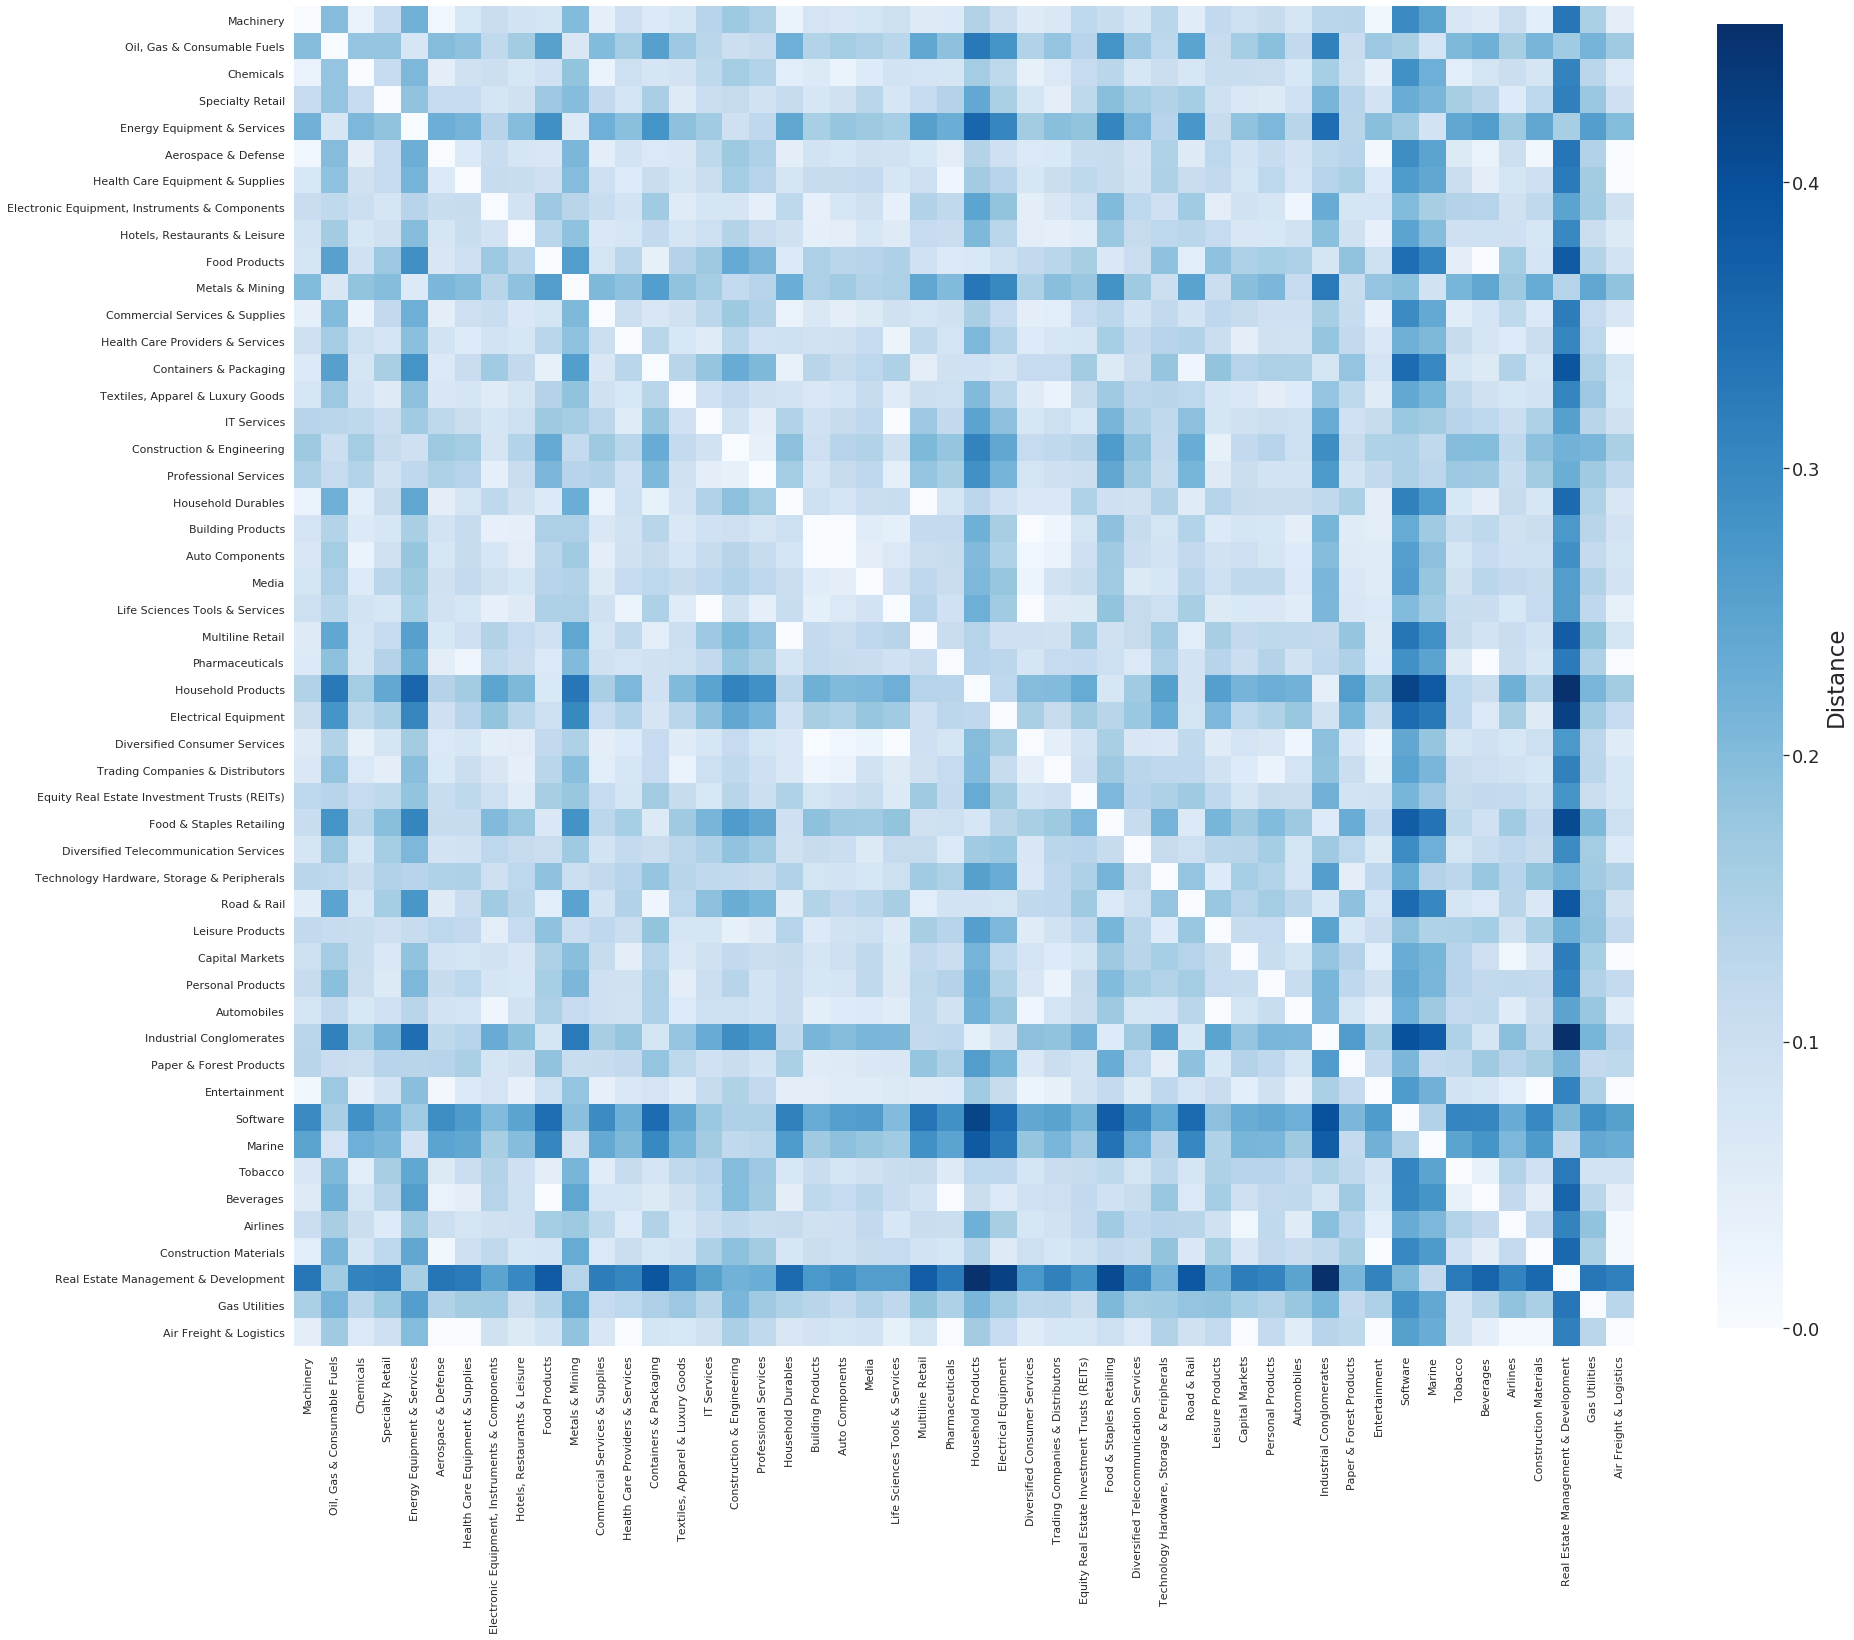

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(30,30))
cbar_kws = cbar_kws={"shrink": .8, "label":"Distance"}
sns.heatmap(dmatrix, ax=ax, vmin=0, square=True, cmap='Blues', cbar_kws=cbar_kws)
fig.axes[-1].yaxis.label.set_size(23)
fig.axes[-1].tick_params(labelsize=18)

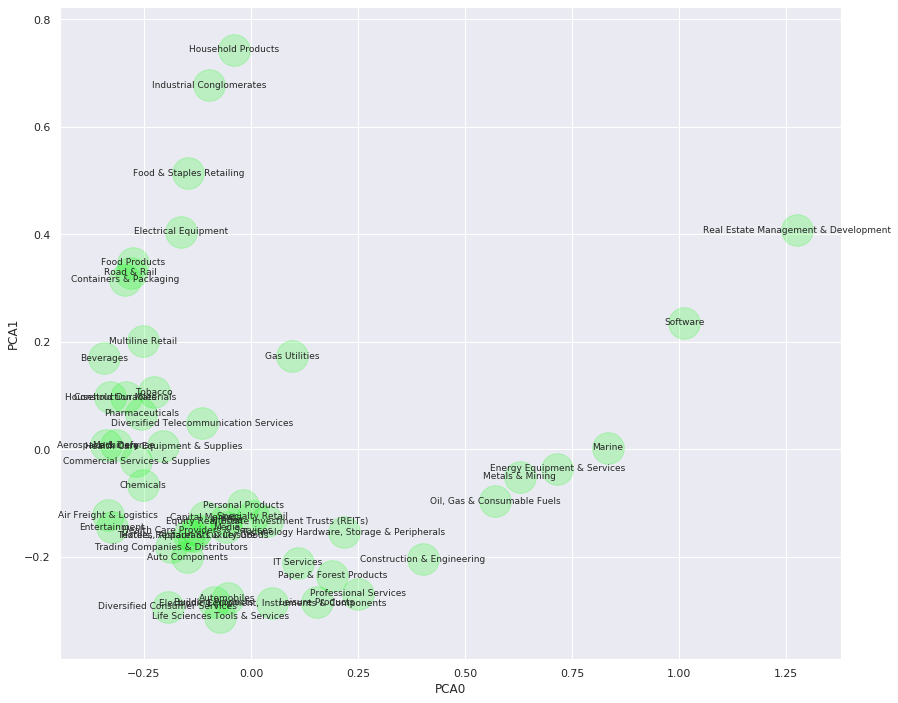

In [8]:
from qclustering import plot_dissimilarity_2d

_, var = plot_dissimilarity_2d(data, 'gics_industry', figsize=(14,12))

Percentage of variance (from the dissimilarity matrix) that is observable in 2 dimensions:

In [9]:
print("{:.2%}".format(var))

60.54%


<div style='height:20px'></div>

__Hierarchical Clustering__

In [10]:
from qclustering import hierarchical_clustering, plot_dendrogram

initial_clusters, linkage = hierarchical_clustering(data, 'gics_industry')
linkage

,child_1,child_2,distance,size,qualitative_values
cluster_id,,,,,
50,19,20,0,500,"[Building Products, Auto Components]"
51,15,22,0,527,"[IT Services, Life Sciences Tools & Services]"
52,18,23,0,478,"[Household Durables, Multiline Retail]"
53,34,37,0,283,"[Leisure Products, Automobiles]"
54,9,44,0,564,"[Food Products, Beverages]"
55,40,46,0,199,"[Entertainment, Construction Materials]"
56,5,49,0,697,"[Aerospace & Defense, Air Freight & Logistics]"
57,50,27,0.0123044,697,"[Building Products, Auto Components, Diversifi..."
58,56,55,0.0184799,896,"[Aerospace & Defense, Air Freight & Logistics,..."


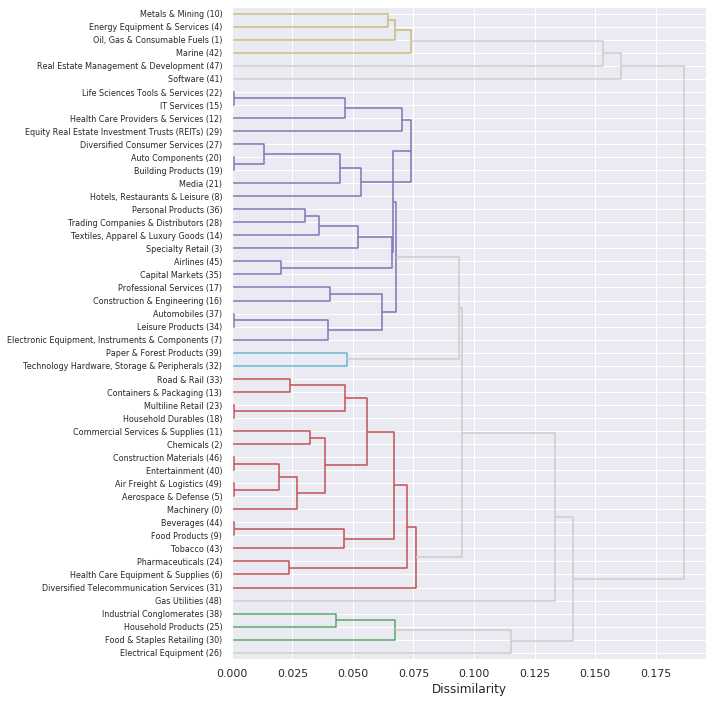

In [11]:
plot_dendrogram(initial_clusters, linkage, color_threshold=0.09, above_threshold_color='#CCCCCC');